# Locality Sensitive Hashing

In [1]:
%matplotlib notebook

import lsh 
import numpy as np
from matplotlib import pyplot as plt

def plot_line(l):
    x1 = -10 
    x2 = 10
    y1 = l[0] * x1 / -l[1]
    y2 = l[0] * x2 / -l[1]
    
    plt.plot([x1, x2], [y1, y2], 'blue')
    
hash_bits = 16

## Generating a Basis

In [2]:
b = lsh.generate_basis(hash_bits, 2)
print('Basis')
print(b)

Basis
[array([-0.5772388 ,  0.81657539]), array([ 0.22847346, -0.97355014]), array([ 0.33861596, -0.94092467]), array([-0.16058259,  0.98702241]), array([ 0.01409484,  0.99990066]), array([ 0.86829589, -0.49604662]), array([-0.34615019,  0.93817911]), array([ 0.5626519 ,  0.82669392]), array([-0.53589655, -0.84428365]), array([-0.75326718,  0.65771464]), array([ 0.58727945,  0.80938424]), array([-0.39064397, -0.92054184]), array([-0.1111902 ,  0.99379914]), array([ 0.56889658, -0.82240907]), array([-0.99999842,  0.00178006]), array([ 0.75671141,  0.65374906])]


# Generate Data

<IPython.core.display.Javascript object>


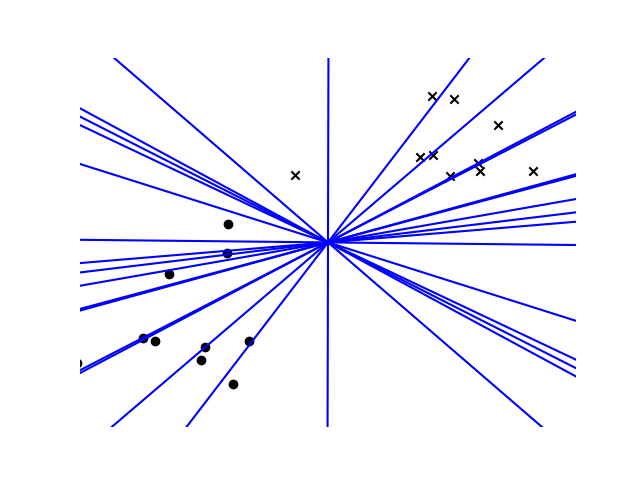

In [3]:
c1 = np.random.multivariate_normal([5, 5], [[5, 0], [0, 5]], 10).T
c2 = np.random.multivariate_normal([-5, -5], [[5, 0], [0, 5]], 10).T

plt.figure()

[plot_line(l) for l in b]
plt.scatter(c1[0], c1[1], marker='x', color='black')
plt.scatter(c2[0], c2[1], marker='o', color='black')

plt.ylim(-10, 10)
plt.xlim(-10, 10)

plt.axis('off')
plt.show()

# Compute Hashes

In [4]:
c1_codes = [lsh.lsh(c, b) for c in c1.T]
c2_codes = [lsh.lsh(c, b) for c in c2.T]

print('Cluster 1')
for c in c1_codes:
    print(''.join(map('{:08b}'.format, c)))
    
print()      
print('Cluster 2')
for c in c2_codes:
    print(''.join(map('{:08b}'.format, c)))

Cluster 1
0001111100101101
1001111100101001
1001111101101001
0001111100101101
1001101101101011
1001111100101001
1001111101101001
1001111100101001
1001111100101001
1001101101101001

Cluster 2
1100001011010010
0110000011010110
1001101011011010
1110000011010110
0110000011010110
0110010010010110
0110000010010110
1110000011010010
0110000010010110
1001001011010010


# Rank

Cluster 1 Distances
0
2
3
0
5
2
3
2
2
4

Cluster 2 Distances
14
14
10
15
14
12
13
16
13
12


<IPython.core.display.Javascript object>


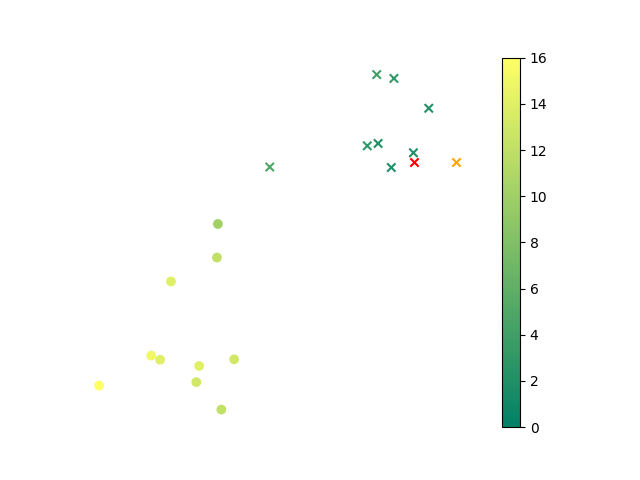

In [5]:
target = c1_codes[0]

c1_dist = [lsh.hamming_distance(h1=target, h2=c) for c in c1_codes]
c2_dist = [lsh.hamming_distance(h1=target, h2=c) for c in c2_codes]

print('Cluster 1 Distances')
for c in c1_dist:
    print(c)
    
print()
print('Cluster 2 Distances')
for c in c2_dist:
    print(c)
    
closest_ind = np.argmin(c1_dist[1:]) + 1
closest = c1[:, closest_ind]

c1_pruned = np.delete(c1, [0, closest_ind], axis=1)
c1_dist_pruned = np.delete(c1_dist, [0, closest_ind])

plt.figure()
cmap = plt.get_cmap('summer', 256)
plt.set_cmap(cmap)
plt.scatter(c1_pruned[0], c1_pruned[1], marker='x', c=c1_dist_pruned, cmap=cmap, vmin=0, vmax=hash_bits)
plt.scatter(c2[0], c2[1], marker='o', c=c2_dist, cmap=cmap, vmin=0, vmax=hash_bits)
plt.colorbar()
plt.scatter(c1[0,0], c1[1,0], marker='x', c='red')
plt.scatter(closest[0], closest[1], marker='x', c='orange')
plt.axis('off')
plt.show()